### Importando librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parte 1

Text(0.5, 1.0, "x2 y x2'")

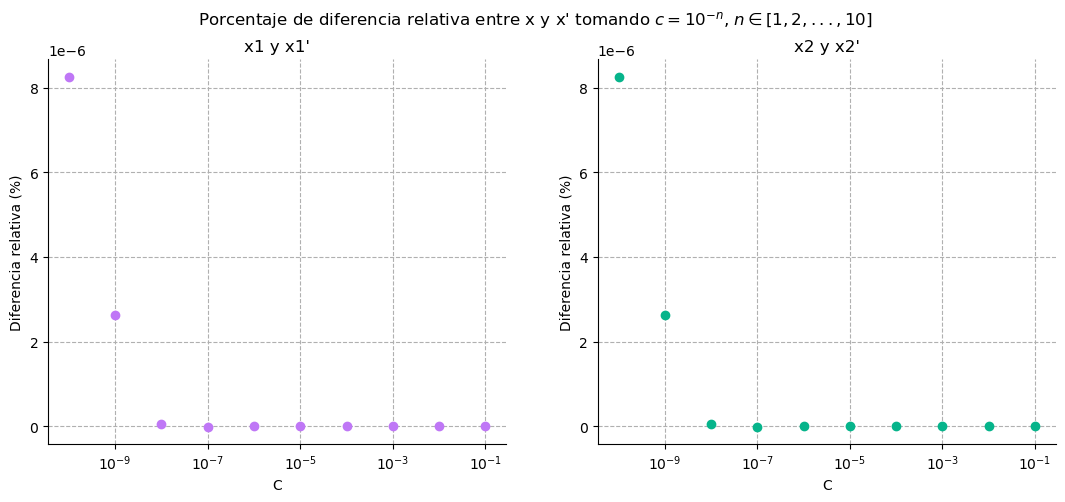

In [2]:
#   Definiendo las dos funciones usadas: normal y (p)rima
def f1(a,b,c):
    return ((-b+np.sqrt(b**2-4*a*c))/(2*a),(-b-np.sqrt(b**2-4*a*c))/(2*a))

def f1p(a,b,c):
    return ((-2*c)/(b+np.sqrt(b**2-4*a*c)),(-2*c)/(b-np.sqrt(b**2-4*a*c)))

#   Ejecutando las funciones para obtener los datos
c = np.logspace(-10,-1,10)  # Obteniendo C
data = np.array([f1(1,1,c), f1p(1,1,c)])

#   Graficando
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))
fig.suptitle('Porcentaje de diferencia relativa entre x y x\' tomando $c=10^{-n}$, $n \in [1,2,...,10]$')

ax1.scatter(c, 100*(data[0][0]-data[1][0])/data[0][0], marker='o', color='xkcd:light purple', label='x1 y x1\'', zorder=2)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xscale('log')
ax1.grid(ls='--')
ax1.set_ylabel('Diferencia relativa (%)')
ax1.set_xlabel('C')
ax1.set_title('x1 y x1\'')

ax2.scatter(c, 100*(data[0][1]-data[1][1])/data[0][1], marker='o', color='xkcd:green blue', label='x2 y x2\'', zorder=2)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xscale('log')
ax2.grid(ls='--')
ax2.set_ylabel('Diferencia relativa (%)')
ax2.set_xlabel('C')
ax2.set_title('x2 y x2\'')

La diferencia relativa es evidentemente más grande entre más pequeño es $C$. Esto de esperar. Tomaría la fórmula original ($x_{1,2}=\frac{-b\pm\sqrt{b^{2}-4ac}}{2a}$) sobre la primada pues la propagación de error dada por el término $C$ es menor al aparecer únicamente en el numerador dentro de una raíz. Del otro modo, además de aparecer en la raíz, afecta a todos los términos en su multiplicación.

### Parte 2

Primero grafiquemos la función original:

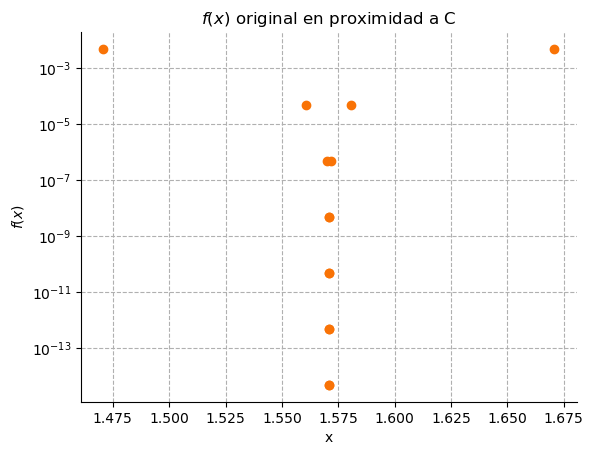

In [3]:
def f(x):   return 1-np.sin(x)
c = np.pi/2
x = np.concatenate((c-np.flip(np.logspace(-10,-1,10)), [c], c+np.logspace(-10,-1,10)))

def graf(x,f, lab):
    plt.scatter(x, f(x), color='xkcd:orange')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.title(f"$f(x)$ {lab} en proximidad a C" )
    plt.ylabel("$f(x)$")
    plt.xlabel("x")
    plt.yscale("log")
    plt.grid(ls="--")

graf(x,f,"original")

Multiplicando $1-\sin{x}$ por $\frac{1+\sin{x}}{1+\sin{x}}$, tenemos $\frac{\cos^{2}x}{1+\sin^{2}x}$, lo cual elimina la resta entre números demasiado cercanos.

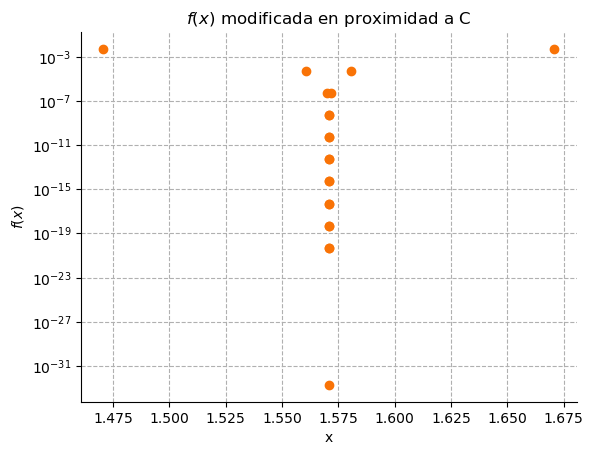

In [4]:
def fp(x):  return (np.power(np.cos(x),2))/(1+np.power(np.sin(x),2))

graf(x,fp,"modificada")

Con la función modificada evitamos la resta entre números muy pequeños, una operación muy vulnerable a errores. Vemos que el resultado se aproxima cada vez más a cero y con una rapidez mayor.